# Author & Title Extraction

In [1]:
# load module
import glob
import os
#pip install PyPDF2 # download
import PyPDF2 as pdf
from PyPDF2 import PdfFileWriter, PdfFileReader

In [2]:
# file path I
pdf_path = '/Users/yanxiaoyu/Desktop/Graduate/RA/1027'
#pdfs = os.listdir(filePath)
pdfs = glob.glob("{}/*.pdf".format(pdf_path))
pdfs

['/Users/yanxiaoyu/Desktop/Graduate/RA/1027/Latham 2003.pdf',
 '/Users/yanxiaoyu/Desktop/Graduate/RA/1027/Kumar 2014.pdf',
 '/Users/yanxiaoyu/Desktop/Graduate/RA/1027/Kuong 2019.pdf',
 '/Users/yanxiaoyu/Desktop/Graduate/RA/1027/Lee 1994.pdf',
 '/Users/yanxiaoyu/Desktop/Graduate/RA/1027/Kuriyan 2016.pdf']

In [3]:
# extract function
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def extract_pdf_content(pdf):
    rsrcmgr = PDFResourceManager()
    codec = 'utf-8'
    outfp = StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr=rsrcmgr, outfp=outfp, codec=codec, laparams=laparams)
    with open(pdf, 'rb') as fp:
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        password = ""
        maxpages = 0
        caching = True
        pagenos=set()
        for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
            interpreter.process_page(page)
    mystr = outfp.getvalue()
    device.close()
    outfp.close()
    return mystr

In [4]:
content = extract_pdf_content(pdfs[1])
#content
#print(content)

In [5]:
mydict = {}
for pdf in pdfs:
    key = pdf.split('/')[-1]
    if not key in mydict:
        print("Extracting content from {} ...".format(pdf))
        mydict[key] = extract_pdf_content(pdf)

Extracting content from /Users/yanxiaoyu/Desktop/Graduate/RA/1027/Latham 2003.pdf ...
Extracting content from /Users/yanxiaoyu/Desktop/Graduate/RA/1027/Kumar 2014.pdf ...
Extracting content from /Users/yanxiaoyu/Desktop/Graduate/RA/1027/Kuong 2019.pdf ...
Extracting content from /Users/yanxiaoyu/Desktop/Graduate/RA/1027/Lee 1994.pdf ...
Extracting content from /Users/yanxiaoyu/Desktop/Graduate/RA/1027/Kuriyan 2016.pdf ...


In [6]:
mydict.keys()

dict_keys(['Latham 2003.pdf', 'Kumar 2014.pdf', 'Kuong 2019.pdf', 'Lee 1994.pdf', 'Kuriyan 2016.pdf'])

In [7]:
import pandas as pd
df = pd.DataFrame.from_dict(mydict, orient = 'index').reset_index()
df.columns = ["path", "content"]
df

,path,content
0,Latham 2003.pdf,"S120Food and Nutrition Bulletin, vol. 24, no. ..."
1,Kumar 2014.pdf,Asia Pac J Clin Nutr 2014;23(3):413-422 ...
2,Kuong 2019.pdf,Article\nMulti-Micronutrient Fortiﬁed Rice Imp...
3,Lee 1994.pdf,"Double-blind,\nmineral\nlow-calcium\n\ndiet’(c..."
4,Kuriyan 2016.pdf,Clinical Nutrition 35 (2016) 190e198\n\nConten...


In [8]:
# Number of words in a pdf
df["length"] = df.content.apply(lambda x: len(x))
df.head()

,path,content,length
0,Latham 2003.pdf,"S120Food and Nutrition Bulletin, vol. 24, no. ...",41613
1,Kumar 2014.pdf,Asia Pac J Clin Nutr 2014;23(3):413-422 ...,53602
2,Kuong 2019.pdf,Article\nMulti-Micronutrient Fortiﬁed Rice Imp...,55732
3,Lee 1994.pdf,"Double-blind,\nmineral\nlow-calcium\n\ndiet’(c...",51003
4,Kuriyan 2016.pdf,Clinical Nutrition 35 (2016) 190e198\n\nConten...,56267


In [9]:
new = df["path"].str.split(".", expand = True)[0].str.split(" ", expand = True) 
df['Author'] = new[0]
df['Year'] = new[1]
df.head()

,path,content,length,Author,Year
0,Latham 2003.pdf,"S120Food and Nutrition Bulletin, vol. 24, no. ...",41613,Latham,2003
1,Kumar 2014.pdf,Asia Pac J Clin Nutr 2014;23(3):413-422 ...,53602,Kumar,2014
2,Kuong 2019.pdf,Article\nMulti-Micronutrient Fortiﬁed Rice Imp...,55732,Kuong,2019
3,Lee 1994.pdf,"Double-blind,\nmineral\nlow-calcium\n\ndiet’(c...",51003,Lee,1994
4,Kuriyan 2016.pdf,Clinical Nutrition 35 (2016) 190e198\n\nConten...,56267,Kuriyan,2016


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

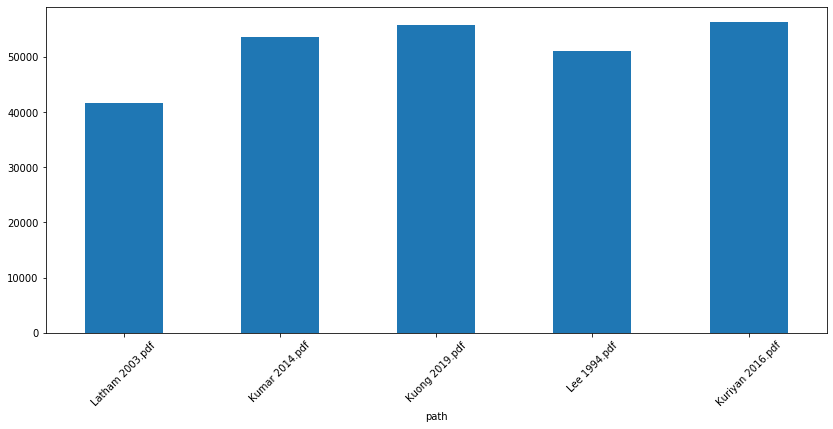

In [10]:
# words visualization
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
df.set_index('path').length.plot(kind='bar')
plt.xticks(rotation=45)

In [11]:
def get_mydict_from_pdf_path(mydict, pdf_path):
    pdfs = glob.glob("{}/*.pdf".format(pdf_path))
    for pdf in pdfs:
        key = pdf.split('/')[-1]
        if not key in mydict:
            print("Extracting content from {} ...".format(pdf))
            mydict[key] = extract_pdf_content(pdf)
    return mydict

In [12]:
def make_df_from_mydict(mydict):
    df = pd.DataFrame.from_dict(mydict, orient='index').reset_index()
    df.columns = ["path", "content"]
    return df

In [16]:
def draw_df(df):
    new = df["path"].str.split(".", expand = True)[0].str.split(" ", expand = True) 
    df['Author'] = new[0]
    df['Year'] = new[1]
    df["length"] = df.content.apply(lambda x: len(x))
    plt.figure(figsize=(14, 6))
    df.set_index('path').length.plot(kind='bar')
    plt.xticks(rotation=45)

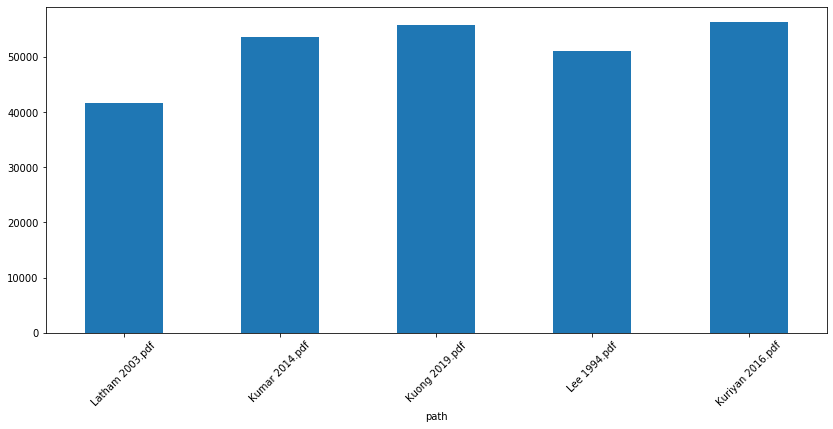

In [17]:
mydict = get_mydict_from_pdf_path(mydict, pdf_path)
df = make_df_from_mydict(mydict)
draw_df(df)

In [18]:
# output
df.to_csv('filename and content extraction.csv', index = False)

In [7]:
# file path
file_path = open('/Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Bates 1994.pdf', 'rb')
# read pdf
pdf_reader = PdfFileReader(file_path)

In [8]:
# get document info
pdf_reader.getDocumentInfo()

{'/Author': 'C. J. Bates, P. H. Evans, G. Allison, B. J. Sonko, S. Hoare, S. Goodrich and T. Aspray',
 '/CreationDate': "D:20050513080051+06'00'",
 '/Creator': 'Acrobat 5.0 Paper Capture Plug-in for Windows',
 '/ModDate': "D:20200917220706-07'00'",
 '/Producer': 'PDFlib PLOP 2.1.0 (sunOS)/Acrobat 4.0 Import Plug-in for Windows',
 '/Subject': 'British Journal of Nutrition',
 '/Title': 'Biochemical indices and neuromuscular function tests in rural Gambian schoolchildren given a riboflavin, or multivitamin plus iron, supplement'}

In [10]:
# get title
pdf_reader.getDocumentInfo().title

'Biochemical indices and neuromuscular function tests in rural Gambian schoolchildren given a riboflavin, or multivitamin plus iron, supplement'